In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,8)
rcParams['font.size'] = 16

In [2]:
# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 80.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon
#tend = 10.0

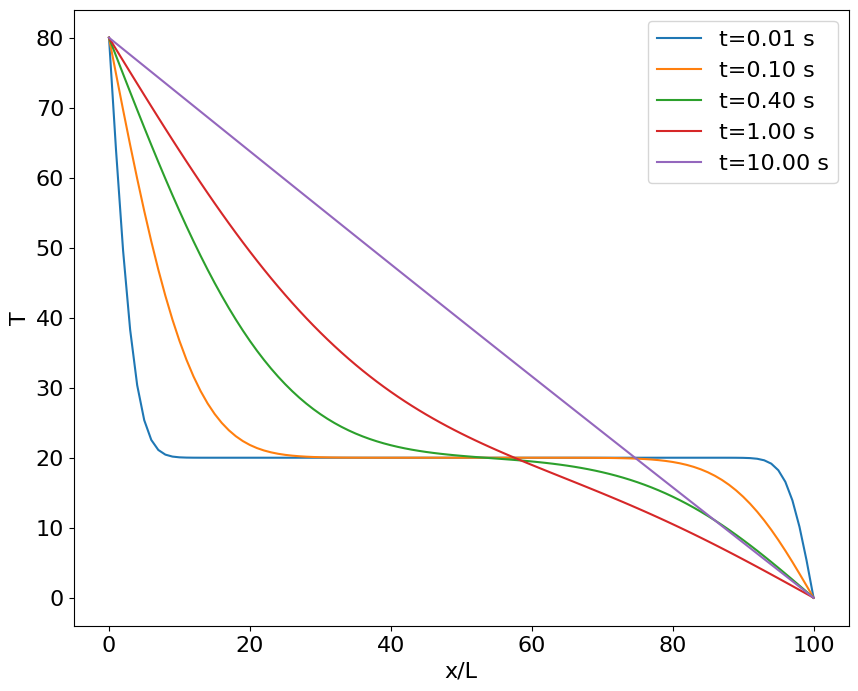

In [3]:
# Create arrays
T = np.empty(N+1,float)
Nt = int(np.ceil(tend/h))
Tfull = np.empty((N+1,Nt), float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = np.empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
it = 0
while t<tend:

    # Calculate the new values of T
    #for i in range(1,N):
    #    Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    Tp[1:N] = T[1:N] + c*(T[2:N+1] + T[:N-1] - 2*T[1:N])
    Tfull[:,it] = Tp
    T,Tp = Tp,T
    t += h
    it += 1

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T, label="t=%.2f s" % (t1))
    if abs(t-t2)<epsilon:
        plt.plot(T, label="t=%.2f s" % (t2))
    if abs(t-t3)<epsilon:
        plt.plot(T, label="t=%.2f s" % (t3))
    if abs(t-t4)<epsilon:
        plt.plot(T, label="t=%.2f s" % (t4))
    if abs(t-t5)<epsilon:
        plt.plot(T, label="t=%.2f s" % (t5))

plt.xlabel("x/L")
plt.ylabel("T")
plt.legend(loc="best")
plt.show()

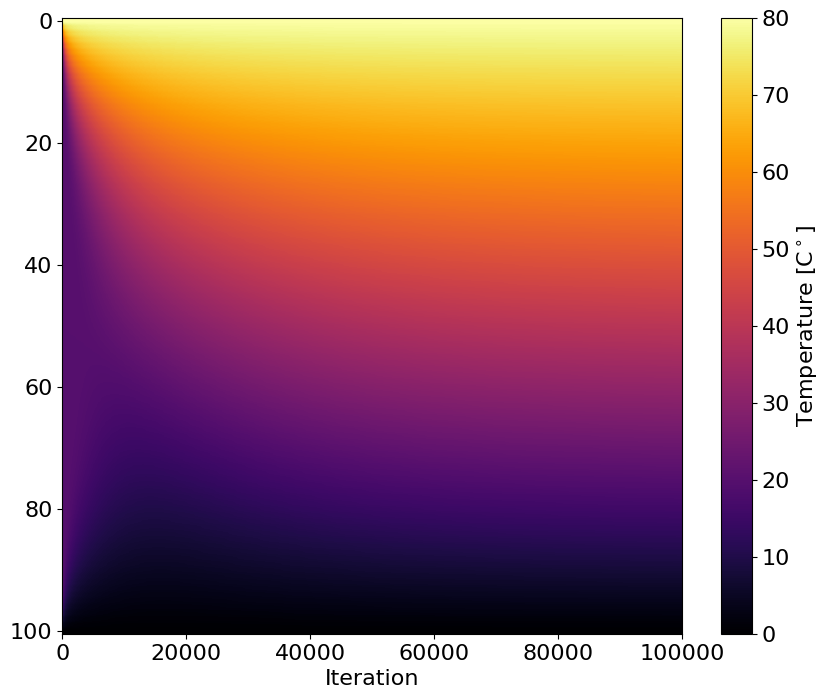

In [5]:
plt.imshow(Tfull, aspect='auto', cmap='inferno')
#plt.contour(Tfull)
plt.colorbar(label=r"Temperature [C$^\circ$]")
plt.xlabel('Iteration')
plt.show()